# Assignment_08

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)

#
# make a matrix each column of which represents an images in a vector form 
#
images  = np.empty((num_image, size_row, size_col), dtype=float)
labels  = np.empty(num_image, dtype=int)

for count, line in enumerate(data):

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    labels[count]       = label
    images[count]    = im_vector.reshape((size_row, size_col))
    

In [2]:
# Define module

class Linear:
    def __init__(self, in_shapes, out_shapes):
        self.weight = np.random.normal(0, 1, (in_shapes, out_shapes))
    
    def __call__(self, x):
        return self.weight.T @ x

class Sigmoid:
    def __call__(self, x):
        return 1 / (1 +np.exp(-x))
    
class Sequential:
    def __init__(self, modules: list):
        self.module_list = modules
    
    def __call__(self, x):
        for layer in self.module_list:
            x = layer(x)
            
        return x

In [3]:
# Declare model

model = Sequential([
    Linear(size_row * size_col, 1),
    Sigmoid()
])

In [4]:
preds  = np.empty(num_image, dtype=float)
avg_preds  = np.empty(10, dtype=float)
avg_images  = np.empty((10, size_row, size_col), dtype=float)

# compute average image
for i in range(10):
    avg_images[i] = images[labels == i].mean(axis=0) 
avg_images = np.asarray(avg_images)

# compute output
for i, image in enumerate(images):
    preds[i] = model(image.reshape(size_row * size_col, 1))

# compute mean of output
for i in range(10):
    avg_preds[i] = preds[labels == i].mean()

## 1. Plot the average image

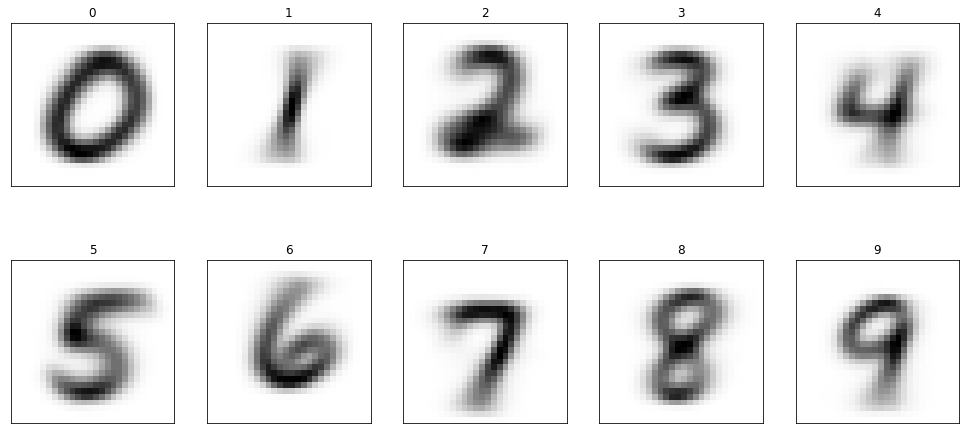

In [5]:
plt.figure(figsize=(17, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(avg_images[i], cmap='Greys', interpolation='None')
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()

## 2. Present the output of the neural network with random weights

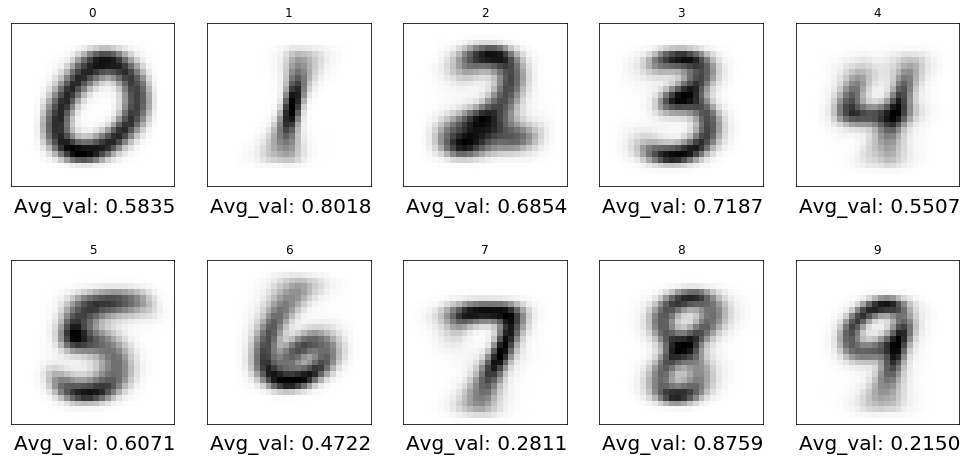

In [6]:
plt.figure(figsize=(17, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(f"{i}")
    plt.text(0, 32, f"Avg_val: {avg_preds[i]:.4f}", size=20)
    plt.imshow(avg_images[i], cmap='Greys', interpolation='None')
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
plt.show()